In [3]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [4]:
def random_i(finish_time,time_delta,max_i):
    length = int(finish_time / time_delta)
    i_data = []
    for i in range(length):
        i_data.append(random.randint(0,max_i))
    return i_data

def spike():
    max_i = int(input('Max I = '))

    resistance = int(input('Resistance = '))
    capacity = int(input('Capacity = '))

    tau = resistance * capacity

    time = 0
    time_delta = 0.5

    u_rest = -70
    threshold = -55
    theta = -60
    delta = 1

    u_data = []

    finish_time = 5000

    i_data = random_i(finish_time,time_delta,max_i)
    i_index = 0
    
    for i in range(len(i_data)):
        if i_data[i] != 0:
            starting_time = int(i*time_delta)
            break
            
    tt = 0
    
    u_t = u_rest

    while (tt + time_delta < finish_time) :

        i_t = i_data[i_index]

        u_t_plus_theta = -time_delta * (u_t - u_rest) / tau + ((time_delta * delta)/tau) * math.exp ((u_t - theta)/delta) + (resistance * time_delta)/tau * i_t + u_t

        time += time_delta
        if u_t_plus_theta >= threshold:

            time = starting_time
            u_t_plus_theta = u_rest
            
        u_data.append(u_t_plus_theta)
        u_t = u_data[-1]
        
        i_index += 1
        tt += time_delta
        
    point1 = [0,threshold]
    point2 = [finish_time,threshold]
    x_values1 = [point1[0], point2[0]]
    y_values1 = [point1[1], point2[1]]
    
    point3 = [0,theta]
    point4 = [finish_time,theta]
    x_values2 = [point3[0], point4[0]]
    y_values2 = [point3[1], point4[1]]
    
    point5 = [0,u_rest]
    point6 = [finish_time,u_rest]
    x_values3 = [point5[0], point6[0]]
    y_values3 = [point5[1], point6[1]]
        
    fig = plt.figure(constrained_layout=True)
    gs = fig.add_gridspec(3, 3)
    axs0 = fig.add_subplot(gs[:-1, :])
    axs1 = fig.add_subplot(gs[-1, :])
    fig.set_figwidth(10)
    fig.set_figheight(8)
    axs0.plot([int(i*time_delta) for i in np.arange(len(u_data))],u_data)
    axs0.plot(x_values1,y_values1,'r--',label='Threshold')
    axs0.plot(x_values2,y_values2,'g--',label='Theta')
    axs0.plot(x_values3,y_values3,'k--',label='U_Rest')
    axs0.set_ylim(-75,-50)
    custom_lines = [Line2D([0], [0],color='w', lw=1),
        Line2D([0], [0],color='w', lw=1),
        Line2D([0], [0],color='w', lw=1),
        Line2D([0], [0],color='w', lw=1)]
    a = 'Max_I = ' + str(max_i)
    b = 'R = ' + str(resistance)
    c = 'C = ' + str(capacity)
    d = 'Delta = ' + str(delta)
    axs0.set_ylabel('U')
    axs0.legend()
    axs0.set_yticks(np.arange(-75,-50,5))
    axs1.plot([int(i*time_delta) for i in np.arange(len(i_data))],i_data)
    axs1.set_ylim(min(i_data)-1,max(i_data)+1)
    axs1.set_ylabel('I')
    axs1.set_xlabel('Time')


Max I = 2
Resistance = 10
Capacity = 15


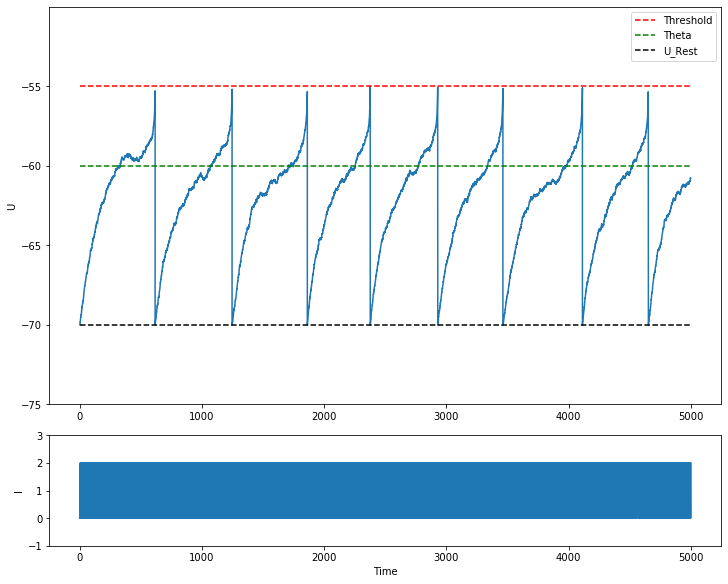

In [5]:
spike()